In [1]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup:
# Setup detectron2 logger
import sys
sys.path.append('..')
from helpers import util
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import imageio
import random
import matplotlib.pyplot as plt
%matplotlib notebook

# from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

--2020-04-20 14:52:19--  http://images.cocodataset.org/val2017/000000439715.jpg
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.227.208
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.227.208|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 209222 (204K) [image/jpeg]
Saving to: ‘input.jpg’

input.jpg           100%[===================>] 204.32K   737KB/s    in 0.3s    

2020-04-20 14:52:20 (737 KB/s) - ‘input.jpg’ saved [209222/209222]



<IPython.core.display.Javascript object>


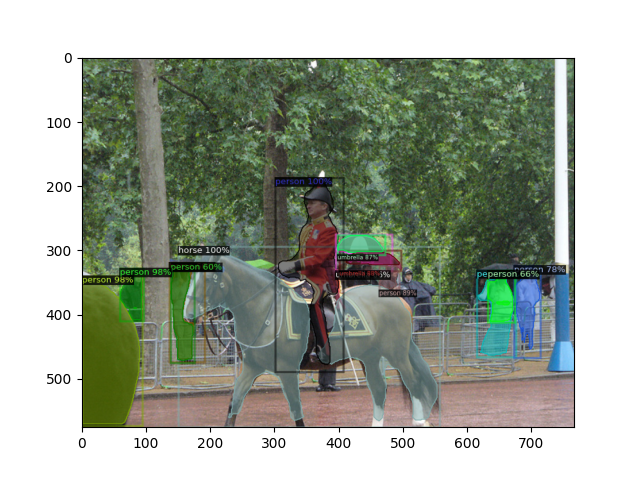

In [2]:
!wget http://images.cocodataset.org/val2017/000000439715.jpg -O input.jpg
im = imageio.imread("./input.jpg")
plt.imshow(im)

In [7]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.3  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

In [4]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.imshow(v.get_image()[:, :, ::-1])

../../data/intervals_testing_horse_det_w_h_0.01fps/aslan/20190104094540_104238/0/as_00_0_000000.jpg


<IPython.core.display.Javascript object>


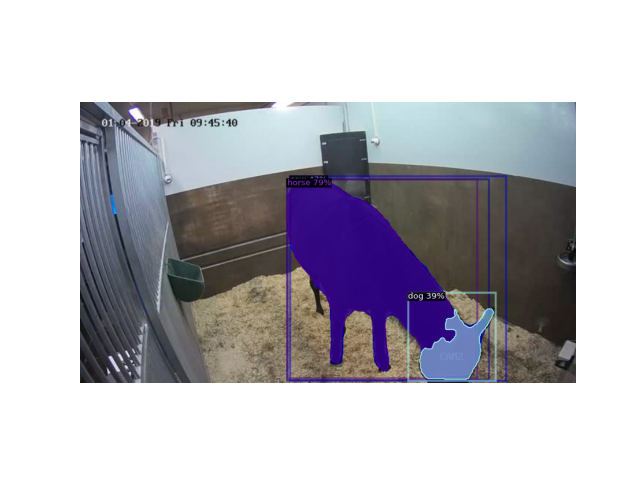

../../data/intervals_testing_horse_det_w_h_0.01fps/aslan/20190104094540_104238/0/as_00_0_000010.jpg


<IPython.core.display.Javascript object>


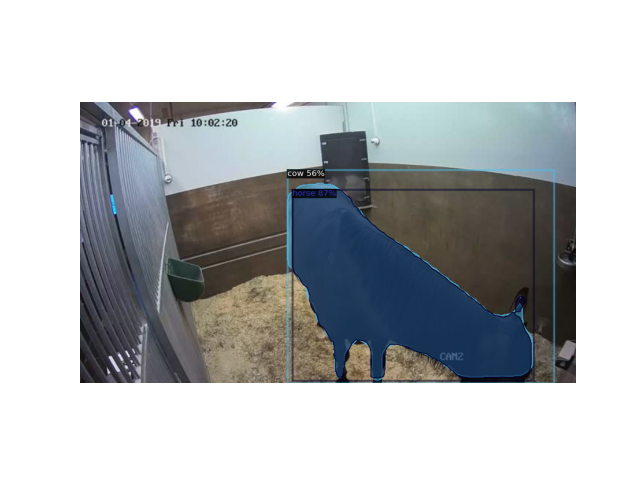

../../data/intervals_testing_horse_det_w_h_0.01fps/aslan/20190104094540_104238/0/as_00_0_000020.jpg


<IPython.core.display.Javascript object>


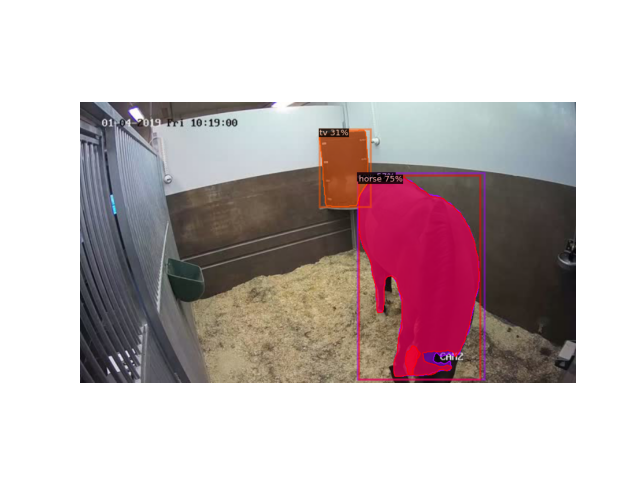

../../data/intervals_testing_horse_det_w_h_0.01fps/aslan/20190104094540_104238/0/as_00_0_000030.jpg


<IPython.core.display.Javascript object>


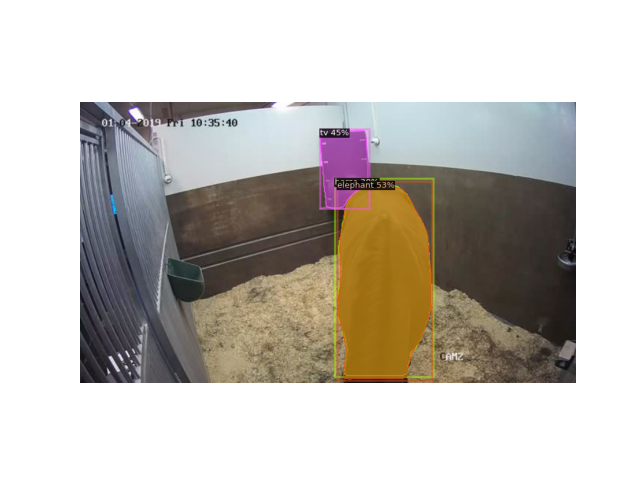

../../data/intervals_testing_horse_det_w_h_0.01fps/aslan/20190104094540_104238/1/as_00_1_000005.jpg


<IPython.core.display.Javascript object>


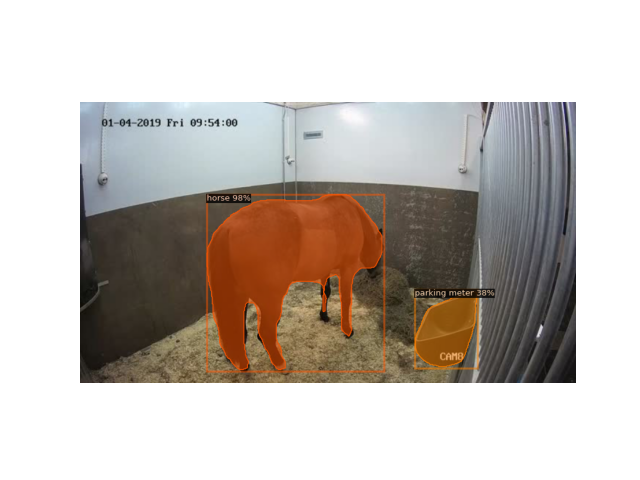

../../data/intervals_testing_horse_det_w_h_0.01fps/aslan/20190104094540_104238/1/as_00_1_000015.jpg


<IPython.core.display.Javascript object>


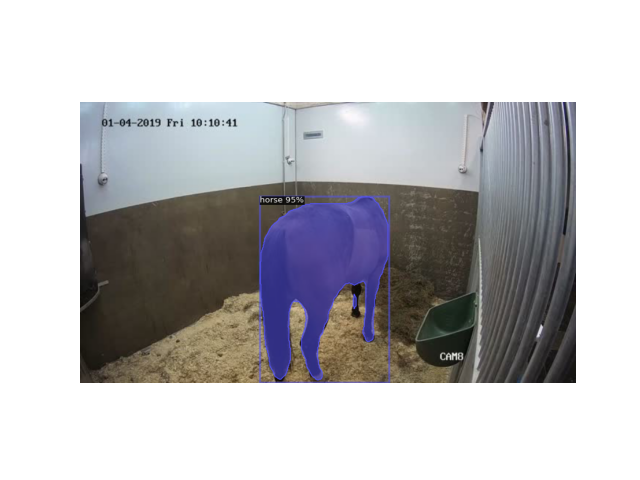

../../data/intervals_testing_horse_det_w_h_0.01fps/aslan/20190104094540_104238/1/as_00_1_000025.jpg


<IPython.core.display.Javascript object>


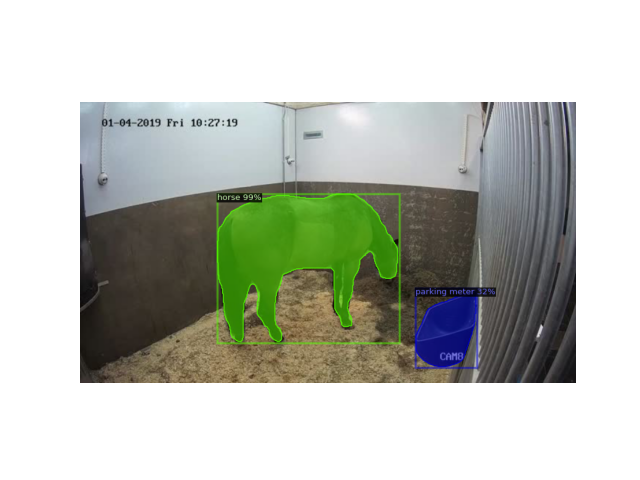

../../data/intervals_testing_horse_det_w_h_0.01fps/aslan/20190104094540_104238/2/as_00_2_000000.jpg


<IPython.core.display.Javascript object>


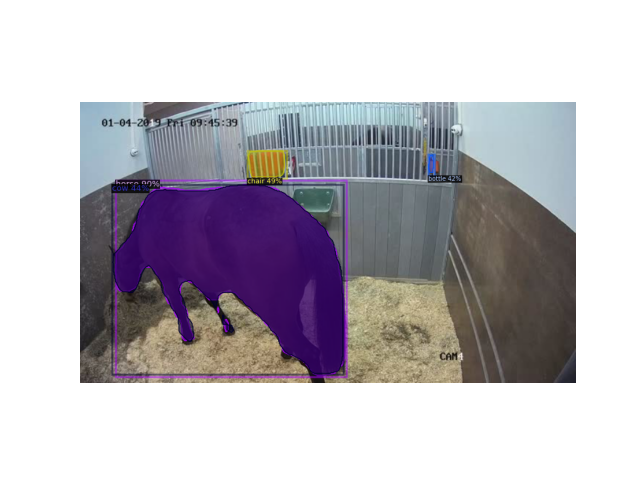

../../data/intervals_testing_horse_det_w_h_0.01fps/aslan/20190104094540_104238/2/as_00_2_000010.jpg


<IPython.core.display.Javascript object>


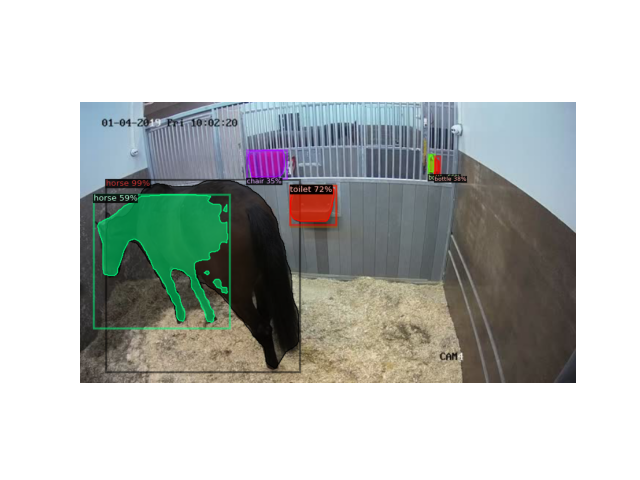

../../data/intervals_testing_horse_det_w_h_0.01fps/aslan/20190104094540_104238/2/as_00_2_000020.jpg


<IPython.core.display.Javascript object>


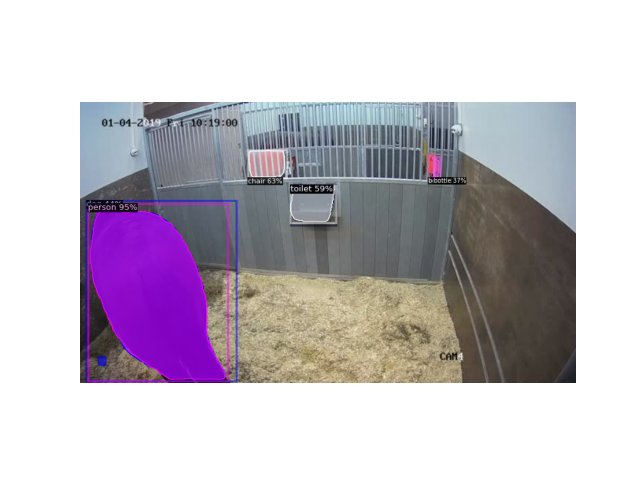

../../data/intervals_testing_horse_det_w_h_0.01fps/aslan/20190104094540_104238/2/as_00_2_000030.jpg


<IPython.core.display.Javascript object>


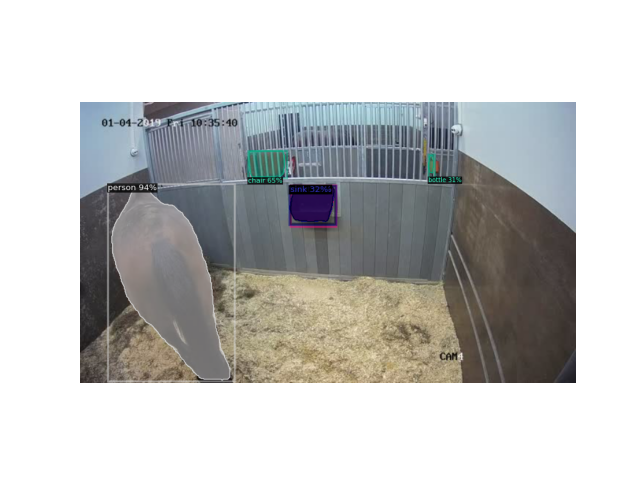

../../data/intervals_testing_horse_det_w_h_0.01fps/aslan/20190104094540_104238/3/as_00_3_000005.jpg


<IPython.core.display.Javascript object>


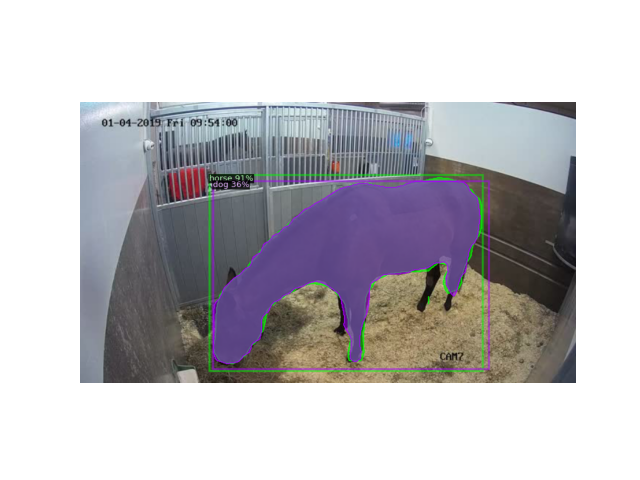

../../data/intervals_testing_horse_det_w_h_0.01fps/aslan/20190104094540_104238/3/as_00_3_000015.jpg


<IPython.core.display.Javascript object>


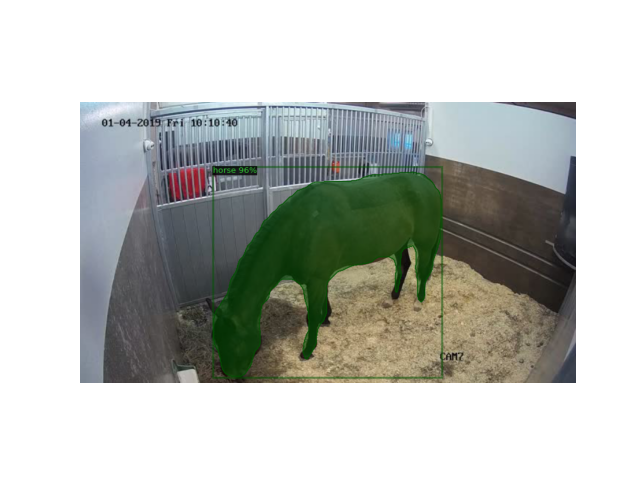

../../data/intervals_testing_horse_det_w_h_0.01fps/aslan/20190104094540_104238/3/as_00_3_000025.jpg


<IPython.core.display.Javascript object>


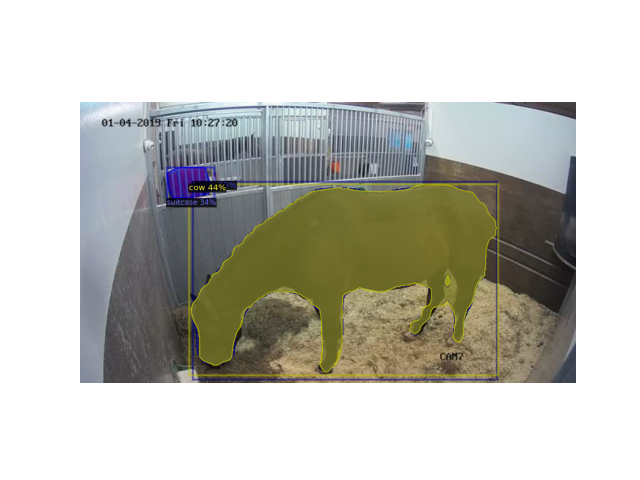

In [10]:
from script_reduce_subject_data import get_image_name
import pandas as pd
import os
from PIL import Image

# data_path = '../../data/pain_no_pain_x2h_intervals_for_extraction_128_128_2fps'
data_path = '../../data/intervals_testing_horse_det_w_h_0.01fps'
horses = ['aslan','brava','herrera','inkasso','julia','kastanjett','naughty_but_nice','sir_holger']
str_aft = '_frame_index.csv'

horse = horses[0]
csv_path = os.path.join(data_path, horse+str_aft)
frame_df = pd.read_csv(csv_path)
for idx_row, row in frame_df.iterrows():
    if idx_row%10==0:
        im_path = get_image_name(row['subject'], row['interval_ind'], row['interval'], \
                                 row['view'], row['frame'], data_path)
        print (im_path)
        im = imageio.imread(im_path)
#         im = Image.fromarray(im)
#         im = np.array(im.resize((128,128)))
        outputs = predictor(im[:,:,::-1])
        v = Visualizer(im, MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
        v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
        plt.figure()
        plt.axis('off')
        plt.imshow(v.get_image())
        
    
    if idx_row>=1000:
        break
